# Explore data set and sequence lengths

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
%%time
enfile = 'data/train/europarl-v7.fr-en.en'
frfile = 'data/train/europarl-v7.fr-en.fr'

with open(enfile, 'r') as f:
    enlines = f.read().split('\n')
with open(frfile, 'r') as f:
    frlines = f.read().split('\n')
lines = zip(enlines, frlines)
lengths = np.array([[len(en), len(fr), en.count(' ')] for en, fr in lines])

CPU times: user 8.9 s, sys: 1.24 s, total: 10.1 s
Wall time: 12.2 s


We can see from the following plot that the line lengths in europarl looks exponentially distributed. We can cut off the longest samples without loosing much:

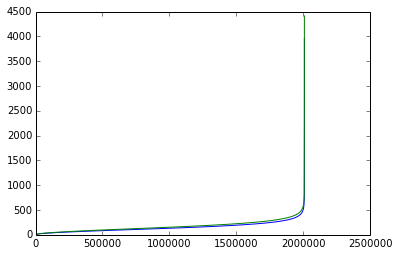

In [10]:
# English and french lengths plotted together. It's hard to see a difference
rng = xrange(len(lengths))
plt.plot(rng, sorted(lengths[:,0]), rng, sorted(lengths[:,1]))

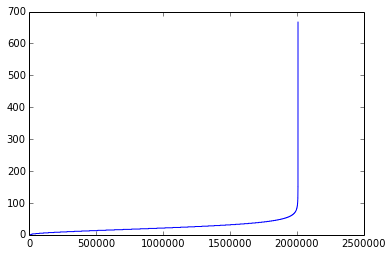

In [6]:
# spaces
plt.plot(rng, sorted(lengths[:,2]))

Lets see the proportion of samples that are left if we remove samples where the *english* sentences that are longer than `upper_cutoff` or shorter than `lower_cutoff`:

In [11]:
upper_cutoff = 400
lower_cutoff = 2
len([x for x in lengths[:,0] if x <= upper_cutoff and x > lower_cutoff])/float(len(lengths[:,0]))

0.9805844827277056

Likewise for *french*

In [16]:
upper_cutoff = 450
lower_cutoff = 2
len([x for x in lengths[:,1] if x <= upper_cutoff and x > lower_cutoff])/float(len(lengths[:,1]))

0.9786340154324

In [19]:
upper_cutoff = 64
len([x for x in lengths[:,2] if x <= upper_cutoff])/float(len(lengths[:,2]))

0.9817853449976192

It seems like french sentences are likely to be slightly longer

# For generating the alphabet to use

This script will generate text files with one line per unique character that is fount in the data. This should ensure that the characters have the same id every time we build a model.

In [71]:
import numpy as np

In [95]:
def generate_alphabet(filenames, alphabet_file):
    """Make a list of all characters that appear at least once in a file in the filenames list.
    Save the list as alphabet_file with one character per line."""
    contents = ''
    for filename in filenames:
        with open(filename, 'r') as f:
            contents += f.read()
    
    with open(alphabet_file, 'w') as f:
        f.write('\n'.join(set(contents)))

In [96]:
generate_alphabet(['data/train/europarl-v7.fr-en.en', 'data/train/giga-fren.release2.en'], 'data/train/alphabet')

# Look at character occurrences in dataset

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
dataset = ['train/europarl-v7.fr-en.en', 'train/europarl-v7.fr-en.fr', 'train/giga-fren.release2.en', 'train/giga-fren.release2.fr']

contents = Counter()

for filename in dataset:
    print("loading (%s) ..." %filename)
    for line in open(filename, 'r'):
        contents.update(line)

loading (train/europarl-v7.fr-en.en) ...
loading (train/europarl-v7.fr-en.fr) ...
loading (train/giga-fren.release2.en) ...
loading (train/giga-fren.release2.fr) ...


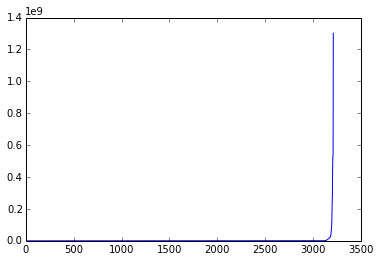

In [19]:
plt.plot(sorted(contents.values()))

In [32]:
its = [(c, n) for c, n in contents.items() if n >= 10000]
print(len(its))
print(its)

222
[('р', 10538), ('z', 5369064), ('_', 4169551), ('"', 3696989), ('2', 21786645), ('ë', 72191), ('—', 607889), ('O', 12803870), ('°', 259612), ('u', 275468931), ('R', 16215409), ('\x19', 10981), ('n', 533126990), ('ο', 12276), ('í', 67572), ('d', 274480663), (']', 1071215), ('ø', 11411), ('\x12', 18713), ('å', 19273), ('с', 10402), ('s', 494944476), ('Ø', 27909), ('Á', 113142), ('µ', 42161), ('`', 87811), ('k', 14534570), ('α', 30593), ('K', 2173256), ('%', 1989989), ('\x07', 42523), ('&', 661794), ('*', 606953), ('\x17', 11517), ('w', 36516664), ('y', 51427559), ('È', 86756), ('3', 11090660), ('•', 3472608), ('ñ', 27252), ('ε', 11350), ('¶', 12110), ('Ê', 24802), ('ü', 55005), ('č', 12294), ('\x05', 12351), ('\x10', 14361), ('~', 91860), ('ï', 164466), ('4', 9451620), (';', 4429422), ('@', 273720), ('\n', 49056246), ('9', 12724848), ('?', 1003625), ('Ö', 20768), ("'", 25618155), ('j', 10632663), ('×', 28532), ('/', 6785526), ('8', 7620574), ('−', 74419), ('™', 94429), ('v', 82614527

# Find sentences with length of k
Use to find sentences with specific amount of words in list of tuples

In [48]:
# from input list of tuples `x`
# find elements that are of length `input_length`
def find_sentences_with_length_of(x, input_length=1, minimum_length=1, target_length=6, duplicates=False):
    wanted = []
    for i in xrange(len(x)):
        if x[i][0].count(' ') < input_length \
        and len(x[i][0]) > minimum_length \
        and x[i][1].count(' ') < target_length:
            wanted.append(x[i])
    if not duplicates:
        wanted = set(wanted)
    
    return wanted

# Check that test set is completely separate from training

In [1]:
trainfile = 'train/europarl-v7.fr-en.en'
testfile = 'test/test2008.en'

with open(trainfile, 'r') as f:
    trainlines = f.read().split('\n')
with open(testfile, 'r') as f:
    testlines = f.read().split('\n')

In [11]:
%%time
duplicates = [testline for testline in testlines if testline in trainlines]

CPU times: user 3min 7s, sys: 59.5 ms, total: 3min 7s
Wall time: 3min 6s


In [13]:
len(duplicates)

50

In [12]:
duplicates

['That concludes the vote.',
 '(The President cut the speaker off)',
 'As the author is not present, Question No 12 lapses.',
 'Human rights',
 'Thank you, Mr Rübig.',
 'Thank you, Mrs Palacio.',
 'The vote will take place tomorrow at 12 noon.',
 'Section IV, Court of Justice',
 '(Parliament adopted the resolution)',
 'Thank you, Commissioner.',
 'Approval of the Minutes of the previous sitting',
 'I welcome this debate.',
 'Approval of the Minutes of the previous sitting',
 'The vote will take place today at 12 noon.',
 '(The President cut the speaker off)',
 'The debate is closed.',
 'Thank you Commissioner.',
 'The debate is closed.',
 '(Parliament adopted the legislative resolution)',
 '(Applause)',
 'That concludes Questions to the Commission.',
 '(Applause from the PPE-DE Group)',
 'The next item is the debate on topical and urgent subjects of major importance.',
 'Vietnam',
 'The vote will take place today at 5.30 p.m.',
 '(Applause)',
 'That has to stop.',
 'The vote will take 